# Iris Flower Classification 🌸
## Identifying Iris Species using Machine Learning

### 📌 Objective:
- Develop a **classification model** to identify **Iris flower species**.
- Train and compare multiple **ML models**.
- Analyze **feature importance** for **tree-based models**.

In [5]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Load dataset from CSV
df = pd.read_csv("C:/Users/abhishek/Downloads/iris.csv")  # Ensure CSV has columns: sepal_length, sepal_width, petal_length, petal_width, species
# Features & target
X = df.drop('variety', axis=1)
y = df['variety']

#data preprocessing
# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)  # Converts species names to numerical labels
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Training & Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    

# Best Model(s)
max_acc = max(results.values())
best_models = [name for name, acc in results.items() if acc == max_acc]
print(f"\nBest Model(s): {', '.join(best_models)} with Accuracy {max_acc:.2f}")


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


SVM Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


KNN Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
     

C:\Users\abhishek\anaconda3_1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


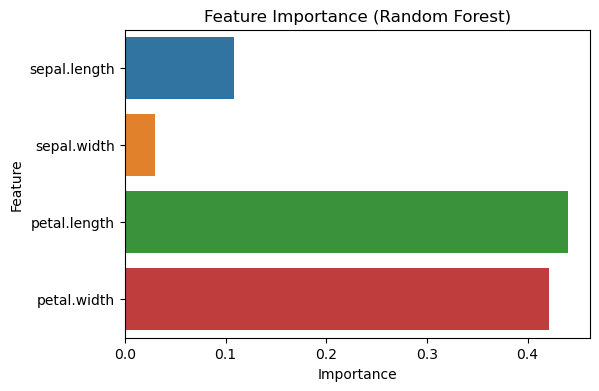

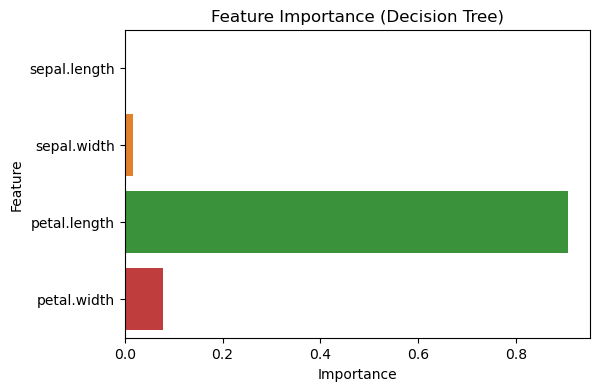

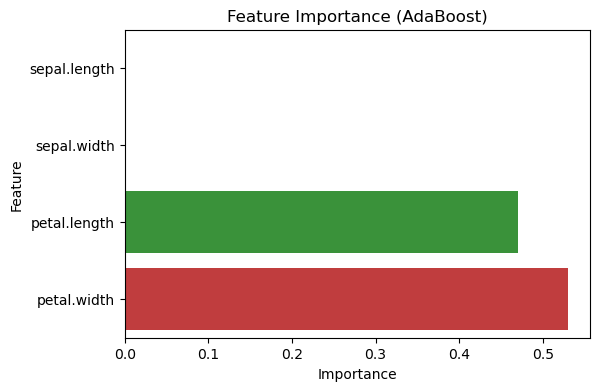

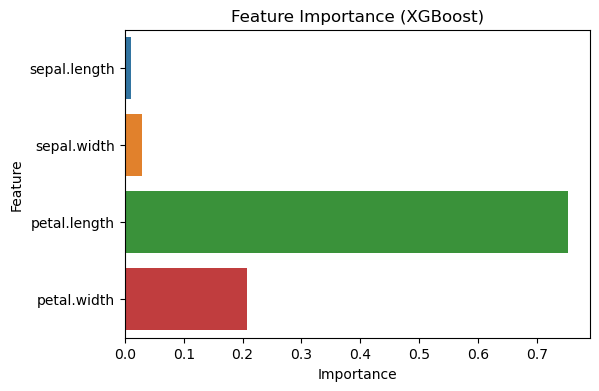

In [8]:
# Feature Importance for ALL tree-based best models
tree_based_models = ["Random Forest", "Decision Tree", "AdaBoost", "XGBoost"]
best_tree_models = [m for m in best_models if m in tree_based_models]

for model_name in best_tree_models:
    feature_importances = models[model_name].feature_importances_
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature_importances, y=df.columns[:-1])
    plt.title(f"Feature Importance ({model_name})")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()